## Phase 3

### Header
#### Course Name: CSE487
#### Project name: Core Trends Analysis
#### Name of group member: Truong Pham, Ricky Chen

### Q Write down the following information: 
#### 1. Problem Statement: 
Our goal is to research and find correlations between modern day technology users and their demographics. Our project focuses on understanding the current patterns that different groups tend to follow. This is an important issue because it shows what interests the younger and older generations are looking towards. This will help companies decide what they should focus on building towards because groups tend to follow trends. If people follow trends and companies develop products and ideas of those trends they will be able to exponentially grow their companie with their product and ideas.

#### 2. Hypothesis:
    + Model data based on age, race and sex/gender 
    + Find Trends in social media
    + Hypothesize there will be significant group that companies will be able to correlate their business with

#### 3 Cleaned Datasets
Display the cleaned dataset after phase 1


In [2]:
# import your cleaned dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("data/Phase_1_data", header=0)
print(df.head(5))

   respid  sample  comp    int_date  lang  cregion  state  density  sfips  \
0       0       1     1  2019-01-08     1        3     37        2  37069   
1       1       1     1  2019-01-08     1        2     39        3  39025   
2       2       1     1  2019-01-08     1        1     34        4  34025   
3       3       1     1  2019-01-08     1        2     18        3  18039   
4       4       1     1  2019-01-14     1        2     26        2  26027   

   qs1  ...  racecmb  birth_hisp  inc  party  partyln  hh1 hh3 qc1    weight  \
0    2  ...        2                3      2             2   2      0.821656   
1    2  ...        1                8      1             2   2      0.817625   
2    2  ...        1                7      1             2   2      0.821656   
3    2  ...        4                6      3        2    2   2      0.821656   
4    2  ...        1                7      3        1    2   2      0.817625   

  cellweight  
0             
1             
2          

#### 4 Modeling  
Please take a look at https://scikit-learn.org/stable/. First of all, understand what is the problem of your research such as classification problem, regression problem, clustering problem...... Then choose your algorithm. For each algorithm, you need to answer the following 5 questions. We give the example answer in section 6. 

**4.1 Method 1**

#### Q: What assumptions need to be verified at this step?
#### A: (answer here)
#### Q: What algorithm did you choose?
#### A: (answer here)
#### Q: Why you choose this algorithm?
#### A: (answer here)
#### Q: What metric can measure the quality of your algorithm?
#### A: (answer here)
#### Q: What is the outcome?
#### A: (answer here)
#### Q: Analysis and discussion:
#### A: (answer here)

In [9]:
# code for modeling

In [10]:
# code for visualization the outcome

**4.2 Method 2**

#### Q: What assumptions need to be verified at this step?
#### A: (answer here)
#### Q: What algorithm did you choose?
#### A: (answer here)
#### Q: Why you choose this algorithm?
#### A: (answer here)
#### Q: What metric can measure the quality of your algorithm?
#### A: (answer here)
#### Q: What is the outcome?
#### A: (answer here)
#### Q: Analysis and discussion:
#### A: (answer here)

In [11]:
# code for modeling

In [12]:
# code for visualization the outcome

**4.3 Method 3**

#### Q: What assumptions need to be verified at this step?
#### A: An internet provider wants to find out which communities are using the internet the most. We need to assume that the ISP knows the frequency of internet use and population density of its customers. We want to be able to generate a report that can give recommendations to prioritize service to certain areas.
#### Q: What algorithm did you choose?
#### A: Linear Regression
#### Q: Why you choose this algorithm?
#### A: After observing the data, we realize that finding correlation between population density and frequency of internet use is relatively simple. We would need a simple and robust algorithm that is also simple to tweak. Linear regression fits this well as it can be easily tweaked to find the intricate details.
#### Q: What metric can measure the quality of your algorithm?
#### A: I would use Mean Squared Error (MSE) to evaluate the Linear Regression.
#### Q: What is the outcome?
#### A: I divided my data into train dataset (contains 50% of data) and test dataset (contains 50% of data). I used the test data to evaluate the outcome of the linear regression algorithm. I used MSE to evaluate the linear regression which returned a MSE of 0.99. A perfect correlation would be 0 and a random number sequence would give a score of around 3.0. I would conclude that there is a correlation between frequency of internet use and population density since the MSE is below 1.
#### Q: Analysis and discussion:
#### A: According to the visualization below, we can conclude that there is a correlation between frequency of internet use and population density. We can also see that as the population density increases, internet usage frequency also increases which we can convey to internet survey providers. Additionally, we could also see the variances between different population densities is also minimal

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

data = df[['density', 'intfreq']].fillna(0)



X = data[['density']].iloc[:, 0].values.reshape(-1, 1)
Y = data[['intfreq']].iloc[:, 0].values.reshape(-1, 1)
X = X[:len(X)//2]
Y = Y[:len(Y)//2]
linear_regressor = LinearRegression()
linear_regressor.fit(X, Y)

Xtest = X[len(X)//2:]
Ytest = Y[len(X)//2:]
Ypred = linear_regressor.predict(Xtest)

# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(Ytest, Ypred))


Mean squared error: 0.99


[1.90372009 1.89359904 1.88347798 1.87335692 1.86323586]
Legend for y-axis:
1 = Almost constantly
2 = Several times a day
3 = About once a day
4 = Several times a week
5 = Less often than several times a week


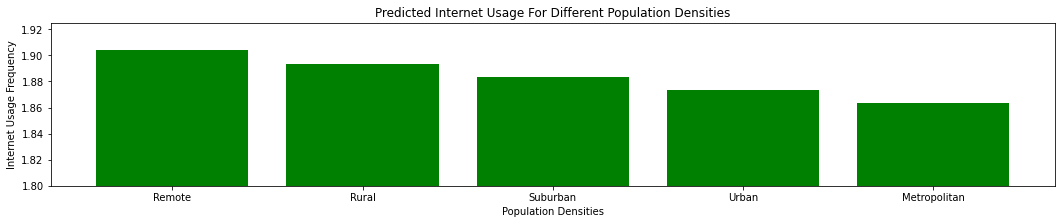

In [24]:
# code for visualization the outcome

predictions = []
for i in range(5):
    newPred = [i+1]
    predictions.append(newPred)
predictions = linear_regressor.predict(predictions)
print(predictions.flatten())

x = [
    'Remote',
	'Rural',
	'Suburban',
	'Urban',
	'Metropolitan'
    ]
x_pos = [i for i, _ in enumerate(x)]
f, ax = plt.subplots(figsize=(18,3))
plt.bar(x, predictions.flatten(), color='green')
ax.set_ylim(bottom=1.8)
ax.set_ylim(top=1.925)
plt.xlabel("Population Densities")
plt.ylabel("Internet Usage Frequency")
plt.title("Predicted Internet Usage For Different Population Densities")

print("Legend for y-axis:")
print('1 = Almost constantly')
print('2 = Several times a day')
print('3 = About once a day')
print('4 = Several times a week')
print('5 = Less often than several times a week')
plt.show()

**4.4 Method 4**

#### Q: What assumptions need to be verified at this step?
#### A: An data company wants to find out which social media users make the most money so they can cater to them. We need to assume that the company knows the social media usage and income bracket of its users. We want to be able to generate a report that can give recommendations to advertise to certain users.
#### Q: What algorithm did you choose?
#### A: Bayesian Ridge Regression
#### Q: Why you choose this algorithm?
#### A: After observing the data, we realized that the company may want to add more data if it gains more users. The Bayesian Ridge Progression will give a full probability distribution over all possible linear models which fits our use case perfectly. We don't need to reiterate over all the data to make predictions, we can just use the previous model.
#### Q: What metric can measure the quality of your algorithm?
#### A: I would use Mean Squared Error (MSE) to evaluate the Bayesian Ridge Regression.
#### Q: What is the outcome?
#### A: I divided my data into train dataset (contains 50% of data) and test dataset (contains 50% of data). I used the test data to evaluate the outcome of the bayesian regression algorithm. I used MSE to evaluate the regression which returned a MSE of 5.39. A perfect correlation would be 0 and a random number sequence gave a score of around 12.82. I would conclude that there is a correlation between social media used and income since the MSE is below that of a random number sequence.
#### Q: Analysis and discussion:
#### A: According to the visualization below, we can conclude that there is a correlation between social media usage and income bracket. We can also see that there are significant predictions for certain sites like LinkedIn. When a user only uses LinkedIn, they are far more likely to be in a higher income bracket than someone who uses any other social media only. This algorithm can be given to data companies to cater to certain customers to maximize their profits. In addition, since we're using the Bayesian Ridge Regression, we are able to easily incorporate future users by adding on to the previous model.

In [21]:
# code for modeling
# https://datatofish.com/multiple-linear-regression-python/ use this gui guide for phase 5
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

data = df[df['inc'] != 98]
data = data[data['inc'] != 99]
data0 = data[['web1a', 'web1b', 'web1c', 'web1d', 'web1e', 'web1f', 'web1g', 'web1h', 'web1i']].fillna(0)
data1 = data[['inc']].fillna(0)
# For the web columns: 1 = yes, 2 = no


X = data0[:len(data0)//2]
Y = data1[:len(data1)//2]
regressor = linear_model.BayesianRidge()
regressor.fit(X, Y.values.ravel())

Xtest = X[len(X)//2:]
Ytest = Y[len(X)//2:]
Ypred = regressor.predict(Xtest.values)

# The mean squared error
print('Mean squared error of tested v.s. predictions: %.2f'
      % mean_squared_error(Ytest, Ypred))
print('Mean squared error of tested v.s. random part of trained: %.2f'
      % mean_squared_error(Ytest, Y[:319]))

Mean squared error of tested v.s. predictions: 5.39
Mean squared error of tested v.s. random part of trained: 12.82


[5.20583989 5.0753719  4.18334197 3.84589266 5.418815   5.02138676
 5.33246204 6.1231411  4.72803451]


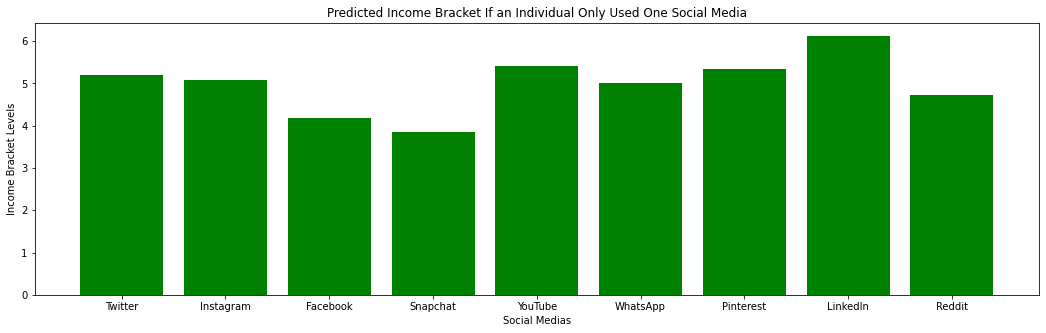

In [22]:
# code for visualization the outcome

predictions = []
for i in range(9):
    newPred = [2, 2, 2, 2, 2, 2, 2, 2, 2]
    newPred[i] = 1
    predictions.append(newPred)
predictions = regressor.predict(predictions)
print(predictions)

x = [
    'Twitter',
	'Instagram',
	'Facebook',
	'Snapchat',
	'YouTube',
	'WhatsApp',
	'Pinterest',
	'LinkedIn',
	'Reddit' 
    ]
x_pos = [i for i, _ in enumerate(x)]

f, ax = plt.subplots(figsize=(18,5))
plt.bar(x_pos, predictions, color='green')
plt.xlabel("Social Medias")
plt.ylabel("Income Bracket Levels")
plt.title("Predicted Income Bracket If an Individual Only Used One Social Media")

plt.xticks(x_pos, x)

plt.show()

**4.5 Method 5**
#### Q: What assumptions need to be verified at this step?
#### A: A social media company wants to find out what education level are their users so they can cater to them. We need to assume that the company knows the social media usage and education level of its users. We want to be able to generate a report that can give recommendations to advertise to certain users.
#### Q: What algorithm did you choose?
#### A: Support Vector Machine
#### Q: Why you choose this algorithm?
#### A: After observing the data, we realized that the company need a classification algorithm. This problem simply needs to identify what graduation level someone is at depending on what social medias that they use. The SVM is able to provide a integer value to the correlated education level. Since education levels are not as granular as income levels, we can rely on an integer value. Since someone cannot have a maximum edcuation level of both a high school graduate and a college graduate, an integer classification works perfectly. I am also able to change the kernel and degree of the SVM so I can have a more fitted model.
#### Q: What metric can measure the quality of your algorithm?
#### A: I would use Mean Squared Error (MSE) to evaluate the  SVM.
#### Q: What is the outcome?
#### A: I divided my data into train dataset (contains 50% of data) and test dataset (contains 50% of data). I used the test data to evaluate the outcome of the bayesian regression algorithm. I used MSE to evaluate the regression which returned a MSE of 2.64. A perfect correlation would be 0 and a random number sequence gave a score of 5.80. I would conclude that there is a correlation between social media used and education level since the MSE is below that of a random number sequence.
#### Q: Analysis and discussion:
#### A: According to the visualization below, we can conclude that there is a correlation between social media usage and education level. We can also see that there are significant predictions for certain sites like WhatsApp. When a user only uses WhatsApp, they are far more likely to be in a higher education level than someone who uses any other social media only. This algorithm can be given to social media companies to cater to certain customers to maximize their profits. Additionally, we can see the model predicts that users who only use SnapChat are usually in a much lower education level. This could be correlated with age as well but this algorithm gives much insight into education levels.

In [24]:
# code for modeling

from sklearn import svm
from sklearn.metrics import mean_squared_error

data = df[df['educ2'] != 98]
data = data[data['educ2'] != 99]
data0 = data[['web1a', 'web1b', 'web1c', 'web1d', 'web1e', 'web1f', 'web1g', 'web1h', 'web1i']].fillna(0)
data1 = data[['educ2']].fillna(0)
# For the web columns: 1 = yes, 2 = no


X = data0[:len(data0)//2]
Y = data1[:len(data1)//2]
svm = svm.SVC(kernel='poly')
svm.fit(X, Y.values.ravel())

Xtest = X[len(X)//2:]
Ytest = Y[len(X)//2:]
Ypred = svm.predict(Xtest.values)

# The mean squared error
print('Mean squared error of tested v.s. predictions: %.2f'
      % mean_squared_error(Ytest, Ypred))
print('Mean squared error of tested v.s. random: %.2f'
      % mean_squared_error(Ytest, Y[:373]))

Mean squared error of tested v.s. predictions: 2.64
Mean squared error of tested v.s. random: 5.80


Education Levels Legend:
1	Less than high school (Grades 1-8 or no formal schooling)
2	High school incomplete (Grades 9-11 or Grade 12 with NO diploma)
3	High school graduate (Grade 12 with diploma or GED certificate)
4	Some college, no degree (includes some community college)
5	Two-year associate degree from a college or university
6	Four-year college or university degree/Bachelor’s degree (e.g., BS, BA, AB)
7	Some postgraduate or professional schooling, no postgraduate degree (e.g. some graduate school)
8	Postgraduate or professional degree, including master’s, doctorate, medical or law degree (e.g., MA, MS, PhD, MD, JD)


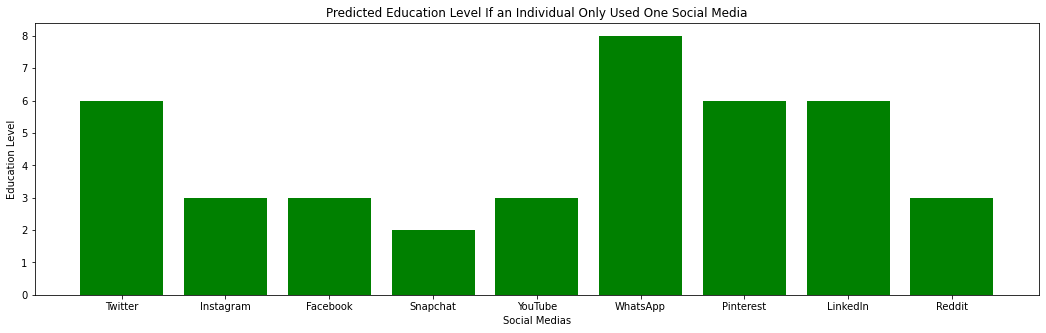

In [25]:
# code for visualization the outcome

predictions = []
for i in range(9):
    newPred = [2, 2, 2, 2, 2, 2, 2, 2, 2]
    newPred[i] = 1
    predictions.append(newPred)
predictions = svm.predict(predictions)

x = [
    'Twitter',
	'Instagram',
	'Facebook',
	'Snapchat',
	'YouTube',
	'WhatsApp',
	'Pinterest',
	'LinkedIn',
	'Reddit' 
    ]
x_pos = [i for i, _ in enumerate(x)]

f, ax = plt.subplots(figsize=(18,5))
plt.bar(x_pos, predictions, color='green')
plt.xlabel("Social Medias")
plt.ylabel("Education Level")
plt.title("Predicted Education Level If an Individual Only Used One Social Media")

plt.xticks(x_pos, x)
print("Education Levels Legend:")
print("1	Less than high school (Grades 1-8 or no formal schooling)")
print("2	High school incomplete (Grades 9-11 or Grade 12 with NO diploma)")
print("3	High school graduate (Grade 12 with diploma or GED certificate)")
print("4	Some college, no degree (includes some community college)")
print("5	Two-year associate degree from a college or university")
print("6	Four-year college or university degree/Bachelor’s degree (e.g., BS, BA, AB)")
print("7	Some postgraduate or professional schooling, no postgraduate degree (e.g. some graduate school)")
print("8	Postgraduate or professional degree, including master’s, doctorate, medical or law degree (e.g., MA, MS, PhD, MD, JD)")


plt.show()

#### 5 Each person contribution
Ricky completed first 2, Truong completed last 3.

#### 6 Example

#### Q: What assumptions need to be verified at this step?
#### A: A Hospital Care chain wants to open a series of Emergency-Care wards within a region. We assume that the hospital knows the location of all the maximum accident-prone areas in the region. They have to decide the number of the Emergency Units to be opened and the location of these Emergency Units, so that all the accident-prone areas are covered in the vicinity of these Emergency Units. We want to help to decide the location of these Emergency Units so that the whole region is covered.
#### Q: What algorithm did you choose?
#### A: k-means
#### Q: Why you choose this algorithm?
#### A: After observing the data, we don't know how many locations there are, and we don't have labelled ground truth data. So we need a clustering algorithm. Kmeans clustering is one of the most popular clustering algorithms and usually the first thing practitioners apply when solving clustering tasks to get an idea of the structure of the dataset. Therefore, we choose k-means algorithm. **I already have completed PCA to map my data to 2 dimension for k-means algorithm.**
#### Q: What metric can measure the quality of your algorithm?
#### A: I would use Percentage of Variance Explained (PVE) to evaluate clustering algorithm.
#### Q: What is the outcome?
#### A: I divided my data into train dataset (contains 90% of data) and test dataset (contains 10% of data). I used the test data to evaluate the outcome of k-means algorithm. In the cluster-predict methodology, we can evaluate how well the models are performing based on different K clusters since clusters are used in the downstream modeling. I will use Elbow method and Silhouette analysis for evaluation.
+ Elbow method:
We use elbow method to check the k we choose.
The following figure shows the result: ...
+ Silhouette analysis: ...

#### Q: Analysis and discussion:
#### A: Accoridng the visualization of clustered data, we could conclude the location of these Emergency Units, which shows in the following image. ......

### Submission guideline:
1. write your code and report in this notebook. 
2. save this notebook as <person1ubname_person2ubname.ipynb>.
3. save your raw data in data folder.
4. save the notebook file with data folder in a folder named <person1ubname_person2ubname.zip>. 
5. upload your zip file to the ub learns.

**Each person from a team needs to make submissions.**

### Grading:
    0 – no submission by deadline;
    5 – complete 1 algorithm with complete analysis and discussion;
    10 – complete 2-3 algorithms with complete analysis and discussion;
    15 – complete 4 algorithms with complete analysis and discussion;
    20 - complete 5 algorithms with complete analysis and discussion, however, the report is the best when compared with other teams;
    25 - the whole process is prefect;
    
The submission deadline is **March 21 on 11:59:00 PM**. (Note 11:59:01 PM will be counted as late submission). Once the deadline is past, you get a zero for the phase if you did not submit anything, even though you need to complete the phase to work on the next phase.
